In [ ]:

# !pip install keras
# # !pip install tensorflow
# pip install numpy==1.24.3
# pip install pandas==1.5.3
# pip uninstall tensorflow keras keras_preprocessing
# pip install tensorflow-cpu==2.13 keras==2.13 keras_preprocessing



In [7]:
import os
import pandas as pd
import numpy as np
from keras_preprocessing.image import load_img
from keras.utils import to_categorical
from keras.models import Sequential, model_from_json
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import matplotlib.pyplot as plt


In [3]:
def create_dataframe(dir):
    image_paths=[]
    labels =[]
    for label in os.listdir(dir):
        for img_name in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,img_name))
            labels.append(label)
            print(label,"completed")
    return image_paths,labels
        
    

In [4]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

train = pd.DataFrame()
train['image'], train['label'] = create_dataframe(TRAIN_DIR)

test = pd.DataFrame()
test['image'], test['label'] = create_dataframe(TEST_DIR)


angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry completed
angry co

Extract the featuers 


In [9]:
def extract_features(images):
    features = []
    for img_path in tqdm(images):
        img = load_img(img_path, color_mode='grayscale', target_size=(48, 48))
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    return features.reshape(len(features), 48, 48, 1)

x_train = extract_features(train['image']) / 255.0
x_test = extract_features(test['image']) / 255.0


%|                                                                                        | 0/28821 [00:00<?, ?it/s]
%|                                                                                | 6/28821 [00:00<09:08, 52.50it/s]
%|                                                                               | 12/28821 [00:00<08:55, 53.81it/s]
%|                                                                               | 18/28821 [00:00<10:16, 46.71it/s]
%|                                                                               | 23/28821 [00:00<11:12, 42.84it/s]
%|                                                                               | 28/28821 [00:00<11:45, 40.81it/s]
%|                                                                               | 33/28821 [00:00<12:12, 39.28it/s]
%|                                                                               | 38/28821 [00:00<12:02, 39.81it/s]
%|                                                             

In [10]:
# Encode Labels (Y data)

le = LabelEncoder()
y_train = le.fit_transform(train['label'])
y_test = le.transform(test['label'])

y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [11]:
model = Sequential()

model.add(Conv2D(128, (3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
226/226 [==============================] - 448s 2s/step - loss: 1.8226 - accuracy: 0.2443 - val_loss: 1.8156 - val_accuracy: 0.2598
Epoch 2/10
226/226 [==============================] - 3319s 15s/step - loss: 1.7853 - accuracy: 0.2573 - val_loss: 1.6994 - val_accuracy: 0.3070
Epoch 3/10
226/226 [==============================] - 789s 3s/step - loss: 1.6893 - accuracy: 0.3152 - val_loss: 1.5627 - val_accuracy: 0.3944
Epoch 4/10
226/226 [==============================] - 537s 2s/step - loss: 1.5732 - accuracy: 0.3812 - val_loss: 1.4498 - val_accuracy: 0.4382
Epoch 5/10
226/226 [==============================] - 1737s 8s/step - loss: 1.4893 - accuracy: 0.4226 - val_loss: 1.3928 - val_accuracy: 0.4703
Epoch 6/10
226/226 [==============================] - 2051s 9s/step - loss: 1.4283 - accuracy: 0.4474 - val_loss: 1.3130 - val_accuracy: 0.5011
Epoch 7/10
226/226 [==============================] - 1404s 6s/step - loss: 1.3943 - accuracy: 0.4644 - val_loss: 1.2743 - val_accuracy: 0

In [13]:
model_json = model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

model.save("emotion_model.h5")
print(" Model saved.")


C:\Users\NILIKA DAS\anaconda3\envs\tfcpuenv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 Model saved.


Actual: happy
1/1 [==============================] - 1s 1s/step
Predicted: happy


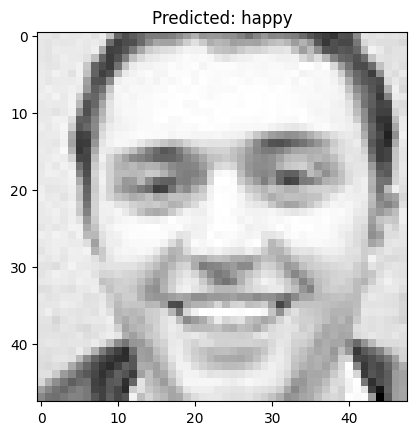

In [20]:
def prepare_image(image_path):
    img = load_img(image_path, color_mode='grayscale', target_size=(48, 48))
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

label_list = ['angry','disgust','fear','happy','neutral','sad','surprise']

image_path = r"C:\Users\NILIKA DAS\face_emotion_recognition\images\test\happy\30.jpg"
print("Actual: happy")
img = prepare_image(image_path)
pred = model.predict(img)
pred_label = label_list[np.argmax(pred)]
print("Predicted:", pred_label)

plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f"Predicted: {pred_label}")
plt.show()
